In [1]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from biological_fuzzy_logic_networks.DREAM_analysis.model_analysis_utils import get_test_data_formatted

/Users/adr/miniconda3/envs/biofuzznet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
client = mlflow.tracking.MlflowClient(tracking_uri="http://localhost:5000")

In [3]:
exp_id = client.get_experiment_by_name("Subnetwork").experiment_id
runs = client.search_runs(experiment_ids=exp_id, max_results=3500)
runs_df = pd.DataFrame([{**dict(run.info), **run.data.params, **run.data.metrics} for run in runs])
runs_df = runs_df.drop(columns = ['artifact_uri', 'end_time', 'experiment_id', 'lifecycle_stage', 
                                  'run_uuid', 'start_time', 'status', 'user_id'])

In [4]:
runs = runs_df[~runs_df["test_mse_RB"].isna()]

In [5]:
runs.dtypes[runs.dtypes!="float64"]

run_id                 object
run_name               object
ccc_job_id             object
pkn_sif                object
network_class          object
output_dir             object
time_point             object
non_marker_cols        object
treatment_col_name     object
minmaxscale            object
add_root_values        object
root_nodes             object
input_value            object
train_treatments       object
valid_treatments       object
train_cell_lines       object
valid_cell_lines       object
convergence_check      object
replace_zero_inputs    object
inhibition_value       object
learning_rate          object
n_epochs               object
batch_size             object
tensors_to_cuda        object
checkpoint_path        object
experiment_name        object
cell_lines             object
test_cell_lines        object
param_setting          object
dtype: object

In [6]:
runs['n_epochs'] = runs["n_epochs"].astype(int)
runs['batch_size'] = runs["batch_size"].astype(int)
runs['learning_rate'] = runs["n_epochs"].astype(float)

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_88096/1076726270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['n_epochs'] = runs["n_epochs"].astype(int)
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_88096/1076726270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['batch_size'] = runs["batch_size"].astype(int)
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_88096/1076726270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [7]:
runs["param_number"] = [setting.split("_")[0] for setting in runs["param_setting"]]
all_cv_params = list((runs.groupby("param_number").size()[runs.groupby("param_number").size()==5]).index)
sel_runs = runs[runs["param_number"].isin(all_cv_params)]
avg_runs = sel_runs.groupby("param_number").mean().reset_index(drop=False)

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_88096/819637499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["param_number"] = [setting.split("_")[0] for setting in runs["param_setting"]]
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_88096/819637499.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_runs = sel_runs.groupby("param_number").mean().reset_index(drop=False)


In [8]:
avg_runs

,param_number,learning_rate,n_epochs,batch_size,train_loss,valid_loss,best_val_loss,val_r2_cleavedCas,val_r2_AKT_S473,val_r2_AKT_T308,...,test_mse_MKK36,test_mse_MKK4,test_mse_p38,test_mse_p53,test_mse_p90RSK,test_mse_RB,test_mse_SMAD23,test_mse_SRC,test_mse_EGFR,test_mse
0,0,10.0,10.0,10000.0,0.009858,0.009791,0.009784,0.083692,1.0,1.0,...,0.018182,1.749175e-32,0.012155,0.021188,0.027376,0.051192,6.403033e-33,3.008143e-33,0.0,0.011487
1,1,50.0,50.0,10000.0,0.007929,0.008099,0.008083,0.096851,1.0,1.0,...,0.016377,1.749175e-32,0.012163,0.021210,0.022107,0.048754,6.403033e-33,3.008143e-33,0.0,0.009353
2,12,10.0,10.0,50000.0,0.009571,0.009615,0.009615,-0.069037,1.0,1.0,...,0.017899,1.749175e-32,0.015484,0.021948,0.037159,0.051161,6.403033e-33,3.008143e-33,0.0,0.010768
3,18,10.0,10.0,100000.0,0.009486,0.009584,0.009584,-0.061721,1.0,1.0,...,0.022356,1.749175e-32,0.014099,0.022507,0.031955,0.052783,6.403033e-33,3.008143e-33,0.0,0.010835
4,19,50.0,50.0,100000.0,0.008205,0.008299,0.008299,0.055882,1.0,1.0,...,0.016847,1.749175e-32,0.013306,0.021496,0.022663,0.051030,6.403033e-33,3.008143e-33,0.0,0.009682
5,20,100.0,100.0,100000.0,0.008018,0.008146,0.008145,0.072972,1.0,1.0,...,0.016288,1.749175e-32,0.012355,0.021291,0.021947,0.049820,6.403033e-33,3.008143e-33,0.0,0.009413
6,21,10.0,10.0,100000.0,0.017495,0.017903,0.017903,-0.087127,1.0,1.0,...,0.054538,1.749175e-32,0.021732,0.023172,0.101654,0.054874,6.403033e-33,3.008143e-33,0.0,0.019634
7,22,50.0,50.0,100000.0,0.008176,0.008283,0.008283,0.037447,1.0,1.0,...,0.016354,1.749175e-32,0.013510,0.021607,0.022174,0.050117,6.403033e-33,3.008143e-33,0.0,0.009567
8,3,10.0,10.0,10000.0,0.008017,0.008151,0.008151,0.069710,1.0,1.0,...,0.016264,1.749175e-32,0.012772,0.021417,0.021920,0.049280,6.403033e-33,3.008143e-33,0.0,0.009429
9,4,50.0,50.0,10000.0,0.008012,0.008139,0.008125,0.099672,1.0,1.0,...,0.016469,1.749175e-32,0.012074,0.021123,0.022395,0.048799,6.403033e-33,3.008143e-33,0.0,0.009392


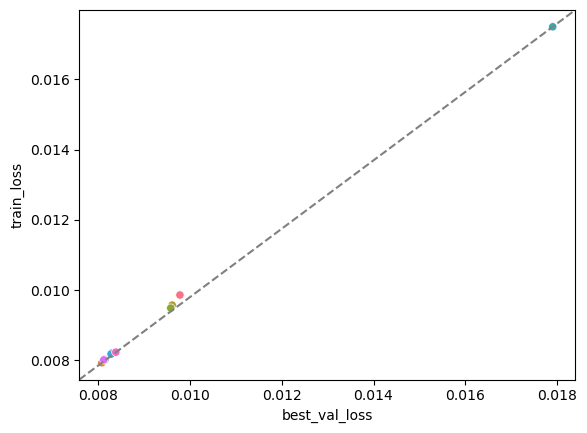

In [9]:
ax = sns.scatterplot(data=avg_runs, x="best_val_loss", y="train_loss", hue="param_number", legend=False)
ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")

<AxesSubplot: xlabel='n_epochs', ylabel='valid_loss'>

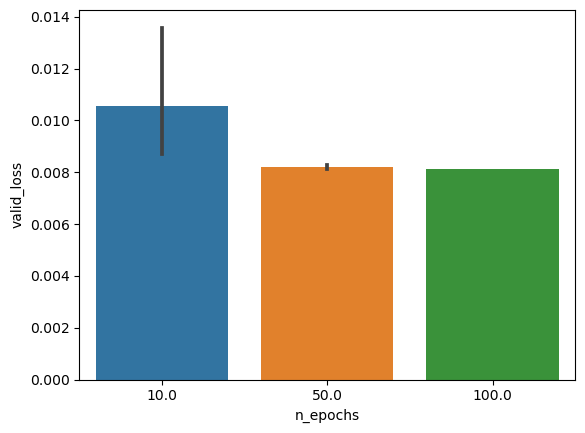

In [10]:
sns.barplot(data=avg_runs, x="n_epochs", y="valid_loss")

<AxesSubplot: xlabel='batch_size', ylabel='valid_loss'>

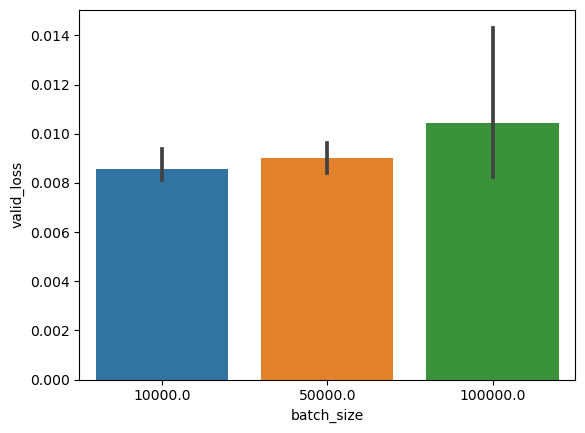

In [11]:
sns.barplot(data=avg_runs, x="batch_size", y="valid_loss")

<AxesSubplot: xlabel='learning_rate', ylabel='valid_loss'>

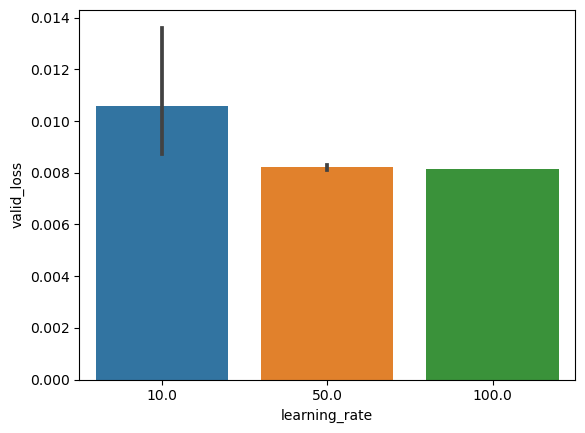

In [12]:
sns.barplot(data=avg_runs, x="learning_rate", y="valid_loss")

In [13]:
val_r2 = pd.melt(frame=avg_runs, id_vars = "param_number", value_vars=['val_r2_cleavedCas', 'val_r2_AKT_S473',
       'val_r2_AKT_T308', 'val_r2_AMPK', 'val_r2_CREB', 'val_r2_ERK12',
       'val_r2_FAK', 'val_r2_GSK3B', 'val_r2_H3', 'val_r2_JNK',
       'val_r2_MAPKAPK2', 'val_r2_MEK12', 'val_r2_MKK36', 'val_r2_MKK4',
       'val_r2_p38', 'val_r2_p53', 'val_r2_p90RSK', 'val_r2_RB',
       'val_r2_SMAD23', 'val_r2_SRC', 'val_r2_EGFR'], var_name="node", value_name="val_r2")
test_r2 = pd.melt(frame=avg_runs, id_vars = "param_number", value_vars=['test_r2_cleavedCas',
       'test_r2_AKT_S473', 'test_r2_AKT_T308', 'test_r2_AMPK', 'test_r2_CREB',
       'test_r2_ERK12', 'test_r2_FAK', 'test_r2_GSK3B', 'test_r2_H3',
       'test_r2_JNK', 'test_r2_MAPKAPK2', 'test_r2_MEK12', 'test_r2_MKK36',
       'test_r2_MKK4', 'test_r2_p38', 'test_r2_p53', 'test_r2_p90RSK',
       'test_r2_RB', 'test_r2_SMAD23', 'test_r2_SRC', 'test_r2_EGFR'], 
        var_name="node", value_name="test_r2")

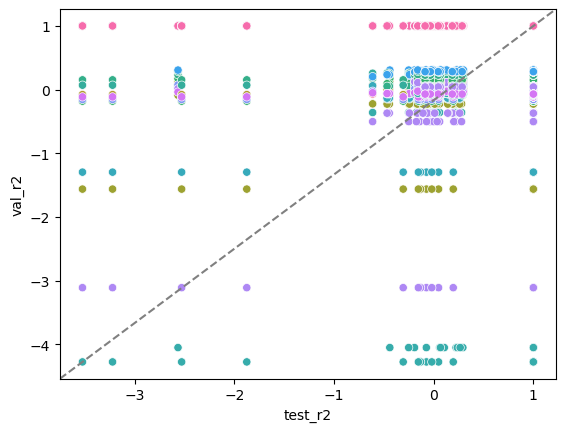

In [14]:
temp = pd.merge(val_r2, test_r2, on="param_number")
ax=sns.scatterplot(data=temp, x="test_r2", y="val_r2", hue="node_x", legend=False)
ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")

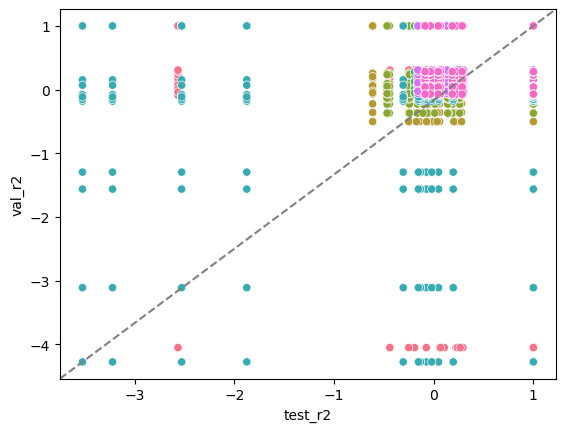

In [15]:
temp = pd.merge(val_r2, test_r2, on="param_number")
ax=sns.scatterplot(data=temp, x="test_r2", y="val_r2", hue="param_number", legend=False)
ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")

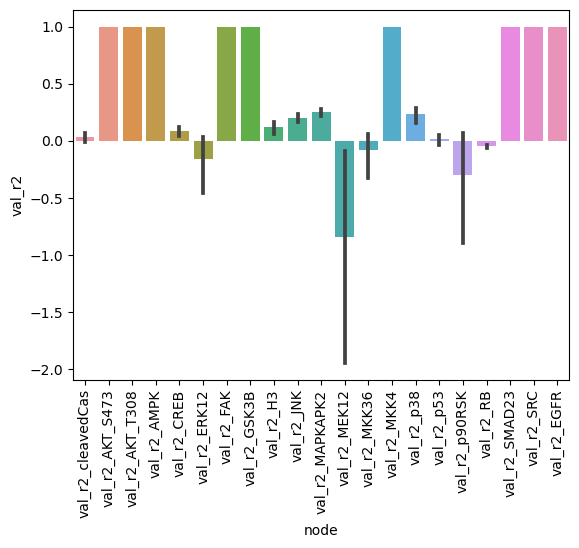

In [16]:
sns.barplot(data=val_r2, x="node", y="val_r2")
t=plt.xticks(rotation=90)

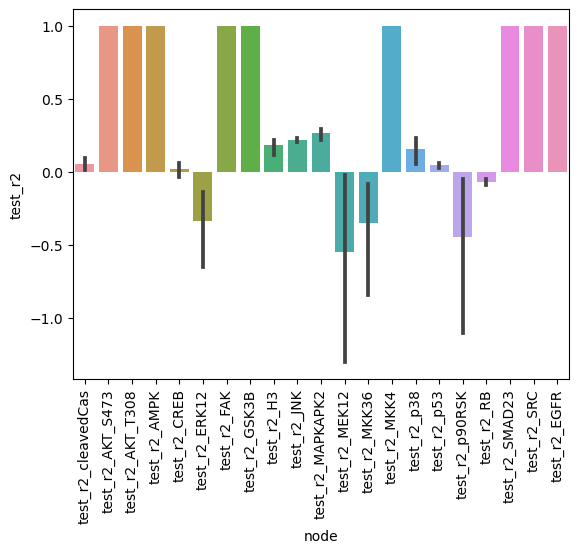

In [17]:
sns.barplot(data=test_r2, x="node", y="test_r2")
t=plt.xticks(rotation=90)

In [18]:
avg_runs.sort_values("valid_loss")

,param_number,learning_rate,n_epochs,batch_size,train_loss,valid_loss,best_val_loss,val_r2_cleavedCas,val_r2_AKT_S473,val_r2_AKT_T308,...,test_mse_MKK36,test_mse_MKK4,test_mse_p38,test_mse_p53,test_mse_p90RSK,test_mse_RB,test_mse_SMAD23,test_mse_SRC,test_mse_EGFR,test_mse
1,1,50.0,50.0,10000.0,0.007929,0.008099,0.008083,0.096851,1.0,1.0,...,0.016377,1.749175e-32,0.012163,0.021210,0.022107,0.048754,6.403033e-33,3.008143e-33,0.0,0.009353
9,4,50.0,50.0,10000.0,0.008012,0.008139,0.008125,0.099672,1.0,1.0,...,0.016469,1.749175e-32,0.012074,0.021123,0.022395,0.048799,6.403033e-33,3.008143e-33,0.0,0.009392
5,20,100.0,100.0,100000.0,0.008018,0.008146,0.008145,0.072972,1.0,1.0,...,0.016288,1.749175e-32,0.012355,0.021291,0.021947,0.049820,6.403033e-33,3.008143e-33,0.0,0.009413
8,3,10.0,10.0,10000.0,0.008017,0.008151,0.008151,0.069710,1.0,1.0,...,0.016264,1.749175e-32,0.012772,0.021417,0.021920,0.049280,6.403033e-33,3.008143e-33,0.0,0.009429
7,22,50.0,50.0,100000.0,0.008176,0.008283,0.008283,0.037447,1.0,1.0,...,0.016354,1.749175e-32,0.013510,0.021607,0.022174,0.050117,6.403033e-33,3.008143e-33,0.0,0.009567
4,19,50.0,50.0,100000.0,0.008205,0.008299,0.008299,0.055882,1.0,1.0,...,0.016847,1.749175e-32,0.013306,0.021496,0.022663,0.051030,6.403033e-33,3.008143e-33,0.0,0.009682
10,9,10.0,10.0,50000.0,0.008231,0.008386,0.008386,0.041252,1.0,1.0,...,0.016133,1.749175e-32,0.013434,0.021710,0.023135,0.051774,6.403033e-33,3.008143e-33,0.0,0.009686
3,18,10.0,10.0,100000.0,0.009486,0.009584,0.009584,-0.061721,1.0,1.0,...,0.022356,1.749175e-32,0.014099,0.022507,0.031955,0.052783,6.403033e-33,3.008143e-33,0.0,0.010835
2,12,10.0,10.0,50000.0,0.009571,0.009615,0.009615,-0.069037,1.0,1.0,...,0.017899,1.749175e-32,0.015484,0.021948,0.037159,0.051161,6.403033e-33,3.008143e-33,0.0,0.010768
0,0,10.0,10.0,10000.0,0.009858,0.009791,0.009784,0.083692,1.0,1.0,...,0.018182,1.749175e-32,0.012155,0.021188,0.027376,0.051192,6.403033e-33,3.008143e-33,0.0,0.011487


In [19]:
runs['test_cell_lines']

0      ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
1      ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
2      ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
3      ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
4      ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
                             ...                        
125    ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
126    ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
127    ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
128    ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
129    ['/dccstor/ipc1/CAR/DREAM/DREAMdata/AU565.csv'...
Name: test_cell_lines, Length: 85, dtype: object

In [20]:
best_param = 1

In [22]:
# Average over folds
data_folder = "/dccstor/ipc1/CAR/DREAM/"
run_base = f"{data_folder}Model/Test/Subnetwork/1_"

test_outputs = []
test_unscaleds = []
for i in range(5):
    print(i)
    run_folder = f"{run_base}{i}/"
    test_output, test_unscaled = get_test_data_formatted(run_folder, data_folder)
    
    test_outputs.append(test_output)
    test_unscaleds.append(test_unscaled)

0
/dccstor/ipc1/CAR/DREAM/Model/Test/Subnetwork/1_0/


FileNotFoundError: [Errno 2] No such file or directory: '/dccstor/ipc1/CAR/DREAM/Model/Test/Subnetwork/1_0/model.pt'

In [ ]:
/dccstor/ipc1/CAR/DREAM/Model/Test/Subnetwork/